## Zaczynamy od zaimportowania potrzebnych rozszerzeń

In [534]:
import pandas as pd
import numpy as np

## Importujemy dane z pliku

In [535]:
df = pd.read_csv('../data/01_raw/data.csv', skipinitialspace=True)

## Podstawowe informacje

In [536]:
print(f"Liczba wierszy: {df.shape[0]}")
print(f"Liczba kolumn: {df.shape[1]}")
print("\nPierwsze 5 wierszy:")
df.head()

Liczba wierszy: 500
Liczba kolumn: 15

Pierwsze 5 wierszy:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Informacje o typach danych w poszczególnych kolumnach
Jak możemy zobaczy, to z pozoru nie ma w tym zestawie danych żadnych wartości null, aczkolwiek to nie prawda. Takie wartości są w nim jak najbardziej obecne, oznaczone są jednak poprzez `?`.

In [537]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             500 non-null    int64 
 1   workclass       500 non-null    object
 2   fnlwgt          500 non-null    int64 
 3   education       500 non-null    object
 4   education-num   500 non-null    int64 
 5   marital-status  500 non-null    object
 6   occupation      500 non-null    object
 7   relationship    500 non-null    object
 8   race            500 non-null    object
 9   sex             500 non-null    object
 10  capital-gain    500 non-null    int64 
 11  capital-loss    500 non-null    int64 
 12  hours-per-week  500 non-null    int64 
 13  native-country  500 non-null    object
 14  income          500 non-null    object
dtypes: int64(6), object(9)
memory usage: 58.7+ KB


## Sprawdzenie duplikatów
W zbiorze danych nie znaleźliśmy żadnych duplikatów, tak więc nie ma konieczności ich usuwania.

In [538]:
print(f"Liczba duplikatów: {df.duplicated().sum()}")

Liczba duplikatów: 0


## Zastąpienie `?` na wartości `null`
Po zmianie zobaczyć możemy faktyczną ilość brakujących danych

In [539]:
df = df.replace('?', np.nan)

# Print basic info
row_with_missing_data = df.isnull().any(axis = 1).sum()
print(f'Wiersze z brakującymi danymi: {row_with_missing_data}\n')
df.info()

Wiersze z brakującymi danymi: 39

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             500 non-null    int64 
 1   workclass       469 non-null    object
 2   fnlwgt          500 non-null    int64 
 3   education       500 non-null    object
 4   education-num   500 non-null    int64 
 5   marital-status  500 non-null    object
 6   occupation      469 non-null    object
 7   relationship    500 non-null    object
 8   race            500 non-null    object
 9   sex             500 non-null    object
 10  capital-gain    500 non-null    int64 
 11  capital-loss    500 non-null    int64 
 12  hours-per-week  500 non-null    int64 
 13  native-country  490 non-null    object
 14  income          500 non-null    object
dtypes: int64(6), object(9)
memory usage: 58.7+ KB


## Wykresy
Na początku importujemy `matplotlib` w celu tworzenia wykresów.

In [540]:
import matplotlib.pyplot as plt

#### Wykres przedstawiający rozkład wieku osób w zbiorze danych

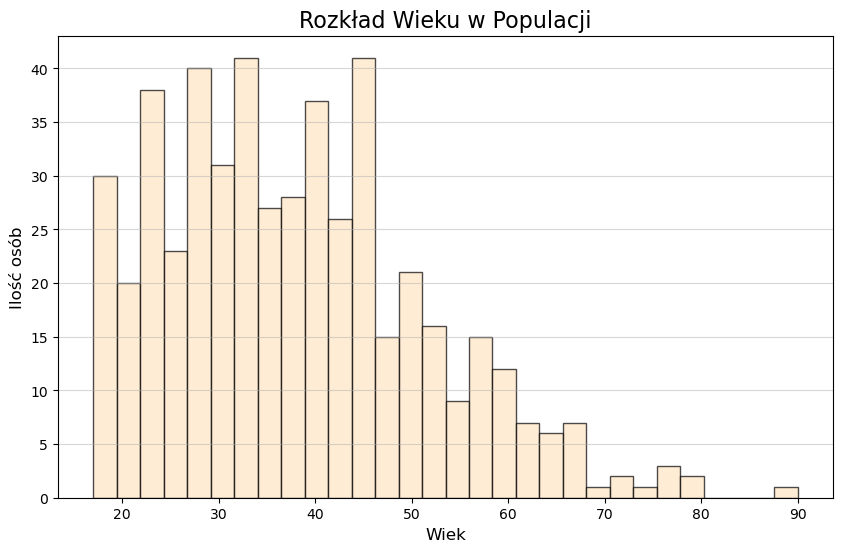

In [541]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=30, edgecolor='black', alpha=0.7, color='bisque') 
plt.title('Rozkład Wieku w Populacji', fontsize=16)
plt.xlabel('Wiek', fontsize=12)
plt.ylabel('Ilość osób', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()

#### Wykres stosunku dochodów do wykształcenia 

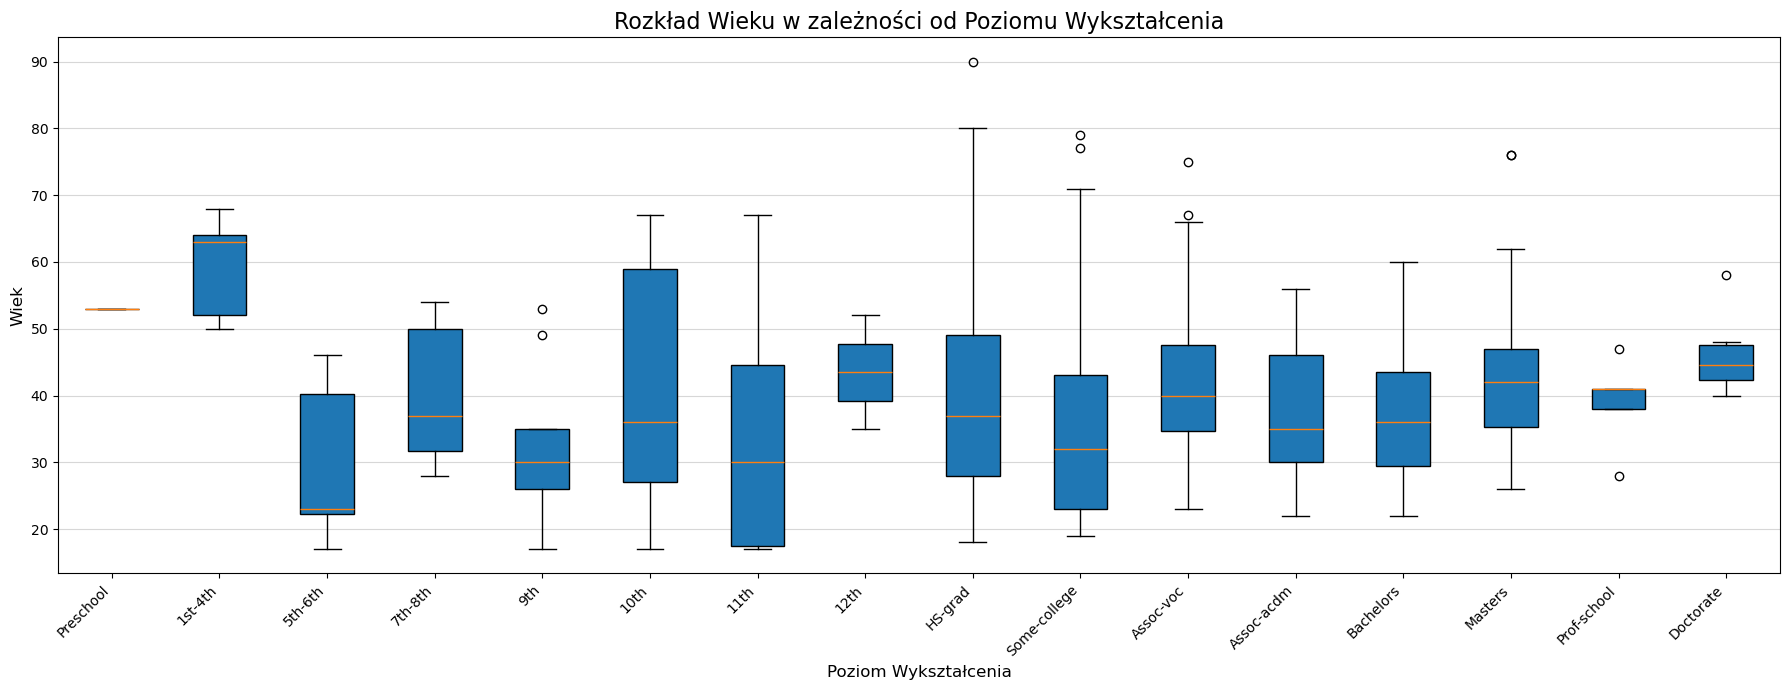

In [542]:
# Sort education levels by education-num
education_map = df.drop_duplicates(subset=['education']).set_index('education-num')['education'].sort_index()
education_order = education_map.tolist()
data_to_plot = [df[df['education'] == level]['age'].dropna() 
                for level in education_order if level in df['education'].unique()]

plt.figure(figsize=(18, 7)) 
plt.boxplot(data_to_plot, patch_artist=True)

# Customize x axis labels
plt.xticks(
    np.arange(1, len(data_to_plot) + 1), 
    education_order,
    rotation=45, 
    ha='right'
) 

plt.title('Rozkład Wieku w zależności od Poziomu Wykształcenia', fontsize=16)
plt.xlabel('Poziom Wykształcenia', fontsize=12)
plt.ylabel('Wiek', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

#### Wykres godzin pracy tygodniowo, a dochodów

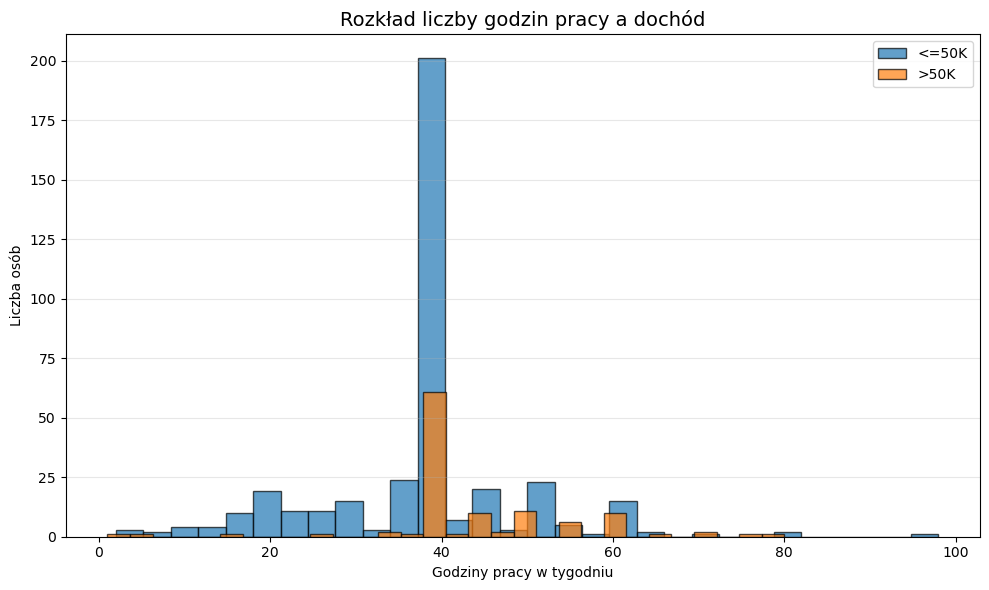

In [543]:
plt.figure(figsize=(10, 6))

plt.hist(df[df['income'] == '<=50K']['hours-per-week'], bins=30, alpha=0.7, label='<=50K', edgecolor='black')
plt.hist(df[df['income'] == '>50K']['hours-per-week'], bins=30, alpha=0.7, label='>50K', edgecolor='black')

plt.title('Rozkład liczby godzin pracy a dochód', fontsize=14)
plt.xlabel('Godziny pracy w tygodniu')
plt.ylabel('Liczba osób')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#### Udział osób w kategoriach zarobków

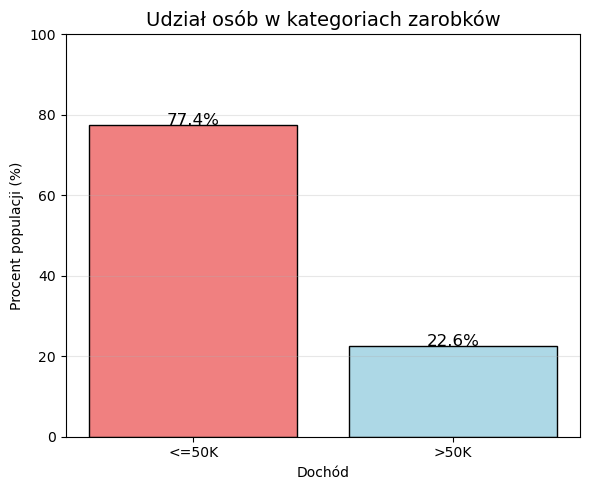

In [544]:
# Normalized value counts for income categories
income_counts = df['income'].value_counts(normalize=True)
income_counts = income_counts * 100  # Convert to percentage

plt.figure(figsize=(6, 5))
plt.bar(income_counts.index, income_counts.values, color=['lightcoral', 'lightblue'], edgecolor='black')

# % Labels above bars
for i, val in enumerate(income_counts.values):
    plt.text(i, val + 0.01, f"{val:.1f}%", ha='center', fontsize=12)

plt.title('Udział osób w kategoriach zarobków', fontsize=14)
plt.ylabel('Procent populacji (%)')
plt.xlabel('Dochód')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Oczyszczanie danych
W celu oczyszczenia zbioru danych z brakujących danych możemy usunąć wiersze posiadające takie braki.

In [545]:
df_cleaned = df.dropna()

removed_rows = len(df) - len(df_cleaned)
print(f'Usunięto {removed_rows} wierszy.\n')

df_cleaned.info()

Usunięto 39 wierszy.

<class 'pandas.core.frame.DataFrame'>
Index: 461 entries, 0 to 498
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             461 non-null    int64 
 1   workclass       461 non-null    object
 2   fnlwgt          461 non-null    int64 
 3   education       461 non-null    object
 4   education-num   461 non-null    int64 
 5   marital-status  461 non-null    object
 6   occupation      461 non-null    object
 7   relationship    461 non-null    object
 8   race            461 non-null    object
 9   sex             461 non-null    object
 10  capital-gain    461 non-null    int64 
 11  capital-loss    461 non-null    int64 
 12  hours-per-week  461 non-null    int64 
 13  native-country  461 non-null    object
 14  income          461 non-null    object
dtypes: int64(6), object(9)
memory usage: 57.6+ KB


## Usuwanie zbędnych kolumn
#### Kolumna `fnlwgt`
Jest to kolumna czysto statystyczna i w żaden sposób nie opisuje jednostki (pojedynczej osoby). Określa ona szacowaną ilość osób takich jak ta opisywana w danym wierszu w populacji. Jej usunięcie pozwoli uniknąć błędów przy ocenie dochodu danej osoby.

In [546]:
df_cleaned = df_cleaned.drop(columns=['fnlwgt'])

#### Kolumna `education`
Kolumna ta określa wykształcenie danej osoby. Usuwamy ją poniewaz dostępna jest również kolumna `education-num` reprezentująca tą samą informację zakodowaną w formie numerycznej. Jedna z nich musi zostać usunięta, aby uniknąć dwukrotnego uwzględniania podczas ML. Dodatkową cechą kolumny jest to, ze jeśli osoba A ma wykształcenie nizsze od osoby B, to ich `education-num` będzie miał następującą zalezność: `A[education-num] < B[education-num]`. 

In [547]:
df_cleaned = df_cleaned.drop(columns=['education'])

#### Rezultaty usuwania kolumn

In [548]:
df_cleaned.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Zapis do pliku pośredniego
Po pozbyciu się duplikatów, zbędnych kolumn oraz wierszy z brakującymi danymi, tak wstępnie przetworzone dane zapisujemy do pliku pośredniego (interim).

In [549]:
df_cleaned.to_csv('../data/02_interim/data_cleaned.csv', index=False)

## Enkodowanie kolumn kategorycznych
Do enkodowania kolumn kategorycznych, które nie posiadają hierachi wykorzystaliśmy kodowanie One-Hot. Zdecydowaliśmy się na wybór właśnie tej strategii, aby wartości pozostały od siebie niezależ.

In [550]:
# Columns to encode
columns_to_encode = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

df_encoded = pd.get_dummies(df_cleaned, 
                            columns=columns_to_encode, 
                            prefix=columns_to_encode,
                            drop_first=True) # Drop first to avoid redundancy

df_encoded.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Jamaica,native-country_Laos,native-country_Mexico,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Taiwan,native-country_Thailand,native-country_United-States
0,39,13,2174,0,40,<=50K,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,50,13,0,0,13,<=50K,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
2,38,9,0,0,40,<=50K,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,53,7,0,0,40,<=50K,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,28,13,0,0,40,<=50K,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


Dodatkowo zakodować należy zmienną, którą będziemy próbowali przewidywać, czyli income. Przyjmuje ona jedynie wartości binarne, więc może on zostać zakodowany jako `0` i `1`.

In [551]:
mapping = {'<=50K': 0, '>50K': 1}
df_encoded['income_encoded'] = df_encoded['income'].map(mapping)
df_encoded.drop(columns=['income'], inplace=True)
df_encoded.head()


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Laos,native-country_Mexico,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Taiwan,native-country_Thailand,native-country_United-States,income_encoded
0,39,13,2174,0,40,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,0
1,50,13,0,0,13,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,0
2,38,9,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,0
3,53,7,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,0
4,28,13,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,0


## Zapis przetworzonych danych do pliku
Po zakończeniu enkodowania danych kategorycznych możemy zapisać takie dane do pliku.

In [552]:
df_encoded.to_csv('../data/03_processed/data_processed.csv', index=False)

## Metryka oceny modelu
Jako nasza metryka oceny modelu wybraliśmy **AP** (Average Precision). Decyzja ta jest zmotywowana faktem, że metryka ta znakomicie radzi sobie przy niezbalansowanych zbiorach danych. Dzięki niej będziemy też mogli skupić się na ocenie jakości modelu w przewidywaniu klasy pozytywnej, czyli tego czy dana osoba zarabia >$50k.

Rozważaliśmy również metrykę AUC-ROC, aczkolwiek jak ustaliliśmy, jej wynik może być łatwo zawyżany przez przewagę w ilości wierszy z klasą negatywną (<$50k).